In [1]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from sympy import * 
from spring_damp import spring_damp_mass

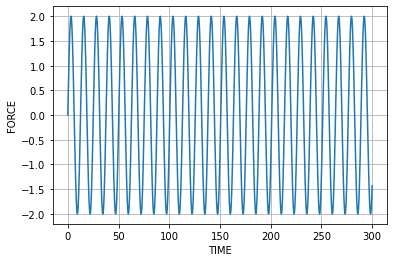

In [4]:
force_sin = sin
sdm_sin = spring_damp_mass(state_vec=[1,0], time_in_sec=300, mass=10, K=2,B=10, delta_mass = 1,delta_K = 0.1, delta_B = 1, force=force_sin, amplitude=2, omega = 0.5)
sdm_sin.force_graph() 

In [5]:
df = sdm_sin.actual_values_csv()

In [8]:
df.to_csv('trial.csv', index=False)

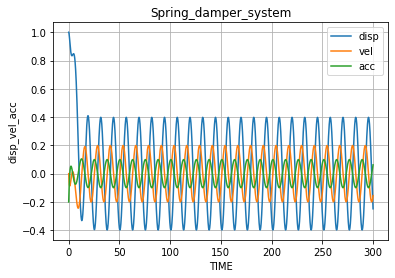

In [10]:
k = sdm_sin.ideal_graph()


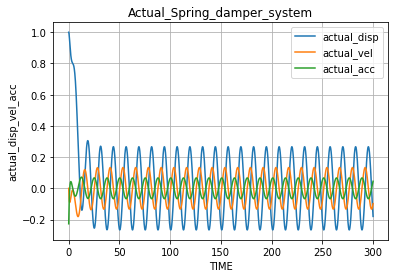

In [4]:
sdm_sin.actual_graph()

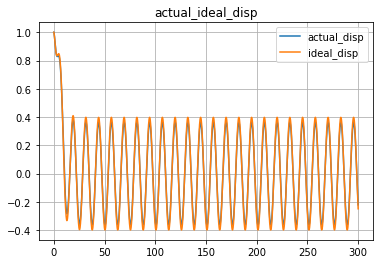

In [11]:
sdm_sin.compare_disp()

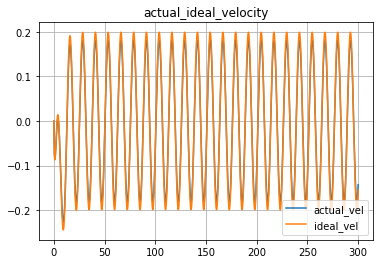

In [12]:
sdm_sin.compare_vel()

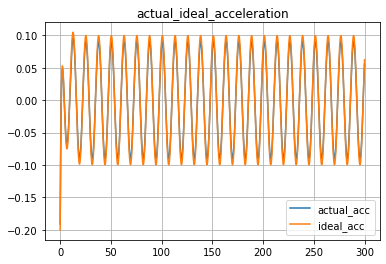

In [13]:
sdm_sin.compare_acc()

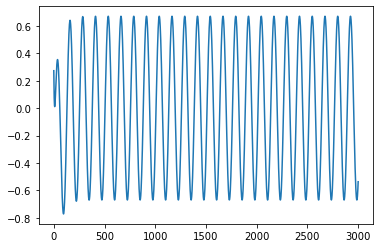

In [8]:
e = sdm_sin.error_equation()
plt.plot(e)

In [19]:

for i in range(5):
    k.append(random.randint(0,10)) 
print(k)

[9, 0, 6, 7, 9]


In [33]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore") 
import time 
import random 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 

from spring_damp import spring_damp_mass

def linear():
    df = pd.read_csv('trial.csv') 

    imp_colums = ["time_step", "actual_disp", "actual_vel", "actual_acc", "G(x)"] 

    for i in df.columns:
        if i not in imp_colums:
            df = df.drop([i], axis=1)
    
    output = df["G(x)"]
    df = df.drop(["G(x)"], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(df, output, random_state=42)

    pipe = make_pipeline(StandardScaler(), LinearRegression()) 
    
    pipe.fit(X_train, y_train)
    return pipe.predict(X_train) 



In [34]:
linear()

array([-0.18750584, -0.18650766,  0.17677054, ...,  0.02353125,
        0.16797108, -0.13633854])

In [41]:
y_test[:]

1801    0.145577
1190    0.003099
1817    0.015509
251     0.029254
2505   -0.044789
          ...   
1775    0.154344
2841   -0.141893
1735   -0.162647
179     0.053942
2922    0.185128
Name: G(x), Length: 751, dtype: float64

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


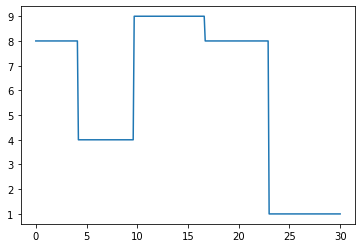

In [77]:
import numpy as np
from random import randint
import random 
import matplotlib.pyplot as plt 

random.seed(44)
t = np.arange(0, 30.1, 0.1)

def time_for_each_mass(m, n):
	arr = [0] * m
	for i in range(n) :
		arr[randint(0, n) % m] += 1
	return arr

def random_mass(down, up, m):
    mass = []
    for i in range(m):
        mass.append(randint(down, up))
    return mass

m = 5;n = len(t)
down = 1; up = 10

time_mass = time_for_each_mass(m, n)
mass = random_mass(down, up, m)

final = []
k = 0
for i in time_mass:
    for j in range(i):
        final.append(mass[k])
    k += 1
print(final)
plt.plot(t, final)
plt.show()

In [120]:
import numpy as np
from random import randint
import random 
import matplotlib.pyplot as plt  
random.seed(49) 

t = np.arange(0, 5.1, 0.1)
_len = len(t)
_no = 5
_range = [1,20]
_time_to_last = [0] * _no 
_item = []
k = 0
_final_item_list = []


for i in range(_no):
    _item.append(randint(_range[0], _range[1]))

for i in range(_len):
    _time_to_last[randint(0, _len) % _no] += 1 

for i in _time_to_last:
    for j in range(i):
        _final_item_list.append(_item[k]) 
    k += 1


In [121]:
_item

[3, 12, 14, 4, 11]

In [122]:
d = {}
for i in _final_item_list:
    if i in d:
        d[i] += 1
    else:
        d[i] = 0
print(d)

{3: 5, 12: 11, 14: 9, 4: 9, 11: 12}


In [123]:
_time_to_last

[6, 12, 10, 10, 13]

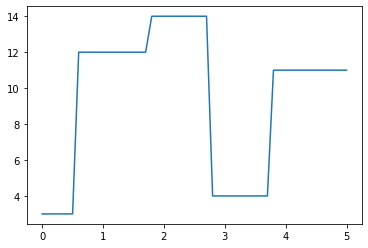

In [124]:
plt.plot(t, _final_item_list)
plt.show()

In [127]:
k = 1 / 0.01
print(k)

100.0
